# Introduction


Melbourne Housing Market Regression Problem

Introduction

I am using the dataset related to Melbourne Housing Market. This data set is available on Kaggle and has been originally scraped from publicly available results from Domain.com.au.
DataSet Reference : https://kaggle.com/anthonypino/melbourne-housing-market

I have developed the following business questions that need to be answered from this dataset

1.	A general understanding of the Melbourne housing market in terms of type of units, prices across different properties a         and locations, etc.
2.	Which elements/features of the Melbourne housing market are critical in determining the price of a property.
3.	By how much will the price go up or down if these features are modified . 
4.	And finally, can we build a suitable price predictive model for them. 


# Analytical Objectives

• Understanding the Melbourne housing market vis a vis the features available.                                                 
• Employ a model in Python using regression analysis to accurately predict the price of a property based on appropriate  
  independent variables.                                                             
• Identify the most significant features in determining the price of a property, and by how much, or volatile, the price 
   movement will be based on a unit change in these features.


# Initial Data Understanding

The data available to us has features that can generally be grouped into two categories: non-geographical and geographical.

The data set consists of a total 21 features and 34,857 records. A brief description is as follows:

Feature-Description
Suburb-Suburb name,
Address-Address of the unit,
Rooms-Number of rooms,
Type-Type of unit,
Price-Price of Unit(AUD),
Method-Status of the unit,
SellerG-Real Estate Agent,
Date-Date Sold,
Distance-Distance from CBD in kilometers,
Postcode-Postal Code,
Bedroom2-Number of bedrooms,
Bathroom-Number of bathrooms,
Car-Number of carspots,
Landsize-Landsize in meters,
BuildingArea-Building size in meters,
YearBuilt-Year the unit was built,
CouncilArea-Governing council for the area,
Lattitude-Lattitude of the unit address,
Longtitude-Longitude of the unit address,
Regionname-Region the area belongs to,
Propertycount-Number of properties in suburb.

Price in the above is our target/dependent variable, while the remaining are independent variables.



# Data Preparation

To perform the analysis we load and initialize the following libraries, followed by loading the dataframe with the read_csv command. We check the total number of instances and features to ensure correct loading of data.

In [18]:
#Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import Imputer
from statsmodels.api import OLS


#setting working directory
os.chdir('D:\MachineLearning\Kaggle\Melbourne')


%matplotlib inline

pd.options.display.float_format= "{:2f}".format

# Importing the dataset
mdata = pd.read_csv('./Melbourne_housing_FULL.csv')

# checking the number of rows and columns in the dataframe
print("Housing Data Rows, Columns  = ", mdata.shape)


Housing Data Rows, Columns  =  (34857, 21)


As expected, we have a total of 21 features and 34,857 records.


# Preview of the data

In [19]:
# checking column names and their data type
print(mdata.dtypes)


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


Price column is already in float and is our dependent variables
the remaining 20 columns are potential independent variables
we need to check their values to understand if their datatypes are correct
and their potential impact on our ML algorithm. We can already see that
Date does not have the correct data type.

We check the first few records of the data to preview the actual values that exist in our data set.

In [20]:
# checking the first few records of the dataset
print(mdata.head())


       Suburb             Address  Rooms Type          Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h            nan     SS  Jellis   
1  Abbotsford        85 Turner St      2    h 1480000.000000      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h 1035000.000000      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u            nan     VB  Rounds   
4  Abbotsford        5 Charles St      3    h 1465000.000000     SP  Biggin   

        Date  Distance    Postcode  ...  Bathroom      Car   Landsize  \
0  3/09/2016  2.500000 3067.000000  ...  1.000000 1.000000 126.000000   
1  3/12/2016  2.500000 3067.000000  ...  1.000000 1.000000 202.000000   
2  4/02/2016  2.500000 3067.000000  ...  1.000000 0.000000 156.000000   
3  4/02/2016  2.500000 3067.000000  ...  2.000000 1.000000   0.000000   
4  4/03/2017  2.500000 3067.000000  ...  2.000000 0.000000 134.000000   

   BuildingArea   YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           

We can summarize from the above the existence of the following:

1. We have categorical data which would need to be encoded before implementation of our ML algortihm
2. Missing Values exist in the dataset which would would need to be addressed.

# Data Attributes Summary

Quick view the of the attributes summary statistics are shown below. Based on the table below we see that outliers exist in our columns such as Rooms, Price, Bedroom, Building area etc.

In [21]:
# checking summary statistics for our numerical columns
mdata.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,27247.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.000000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1050173.344955,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.256400,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,641467.130105,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.267060,37.328178,0.090279,0.120169,4428.090313
min,1.000000,85000.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,635000.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,870000.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1295000.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,11200000.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


# Checking for missing values

In [22]:
# summaricing the existence of missing values
mdata.isnull().sum().sort_values(ascending=False)


BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
Propertycount        3
CouncilArea          3
Postcode             1
Distance             1
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

 First and foremost there are missing values in our dependent variable
 based on explanation available on Kaggle it is not clear why Price hs
 has missing values. Perhaps they just missed the data. In the absence,
 of this information we can delete these 7,610 records

In [23]:
mdata=mdata.dropna(subset=['Price'])

# checking the remaining missing values
mdata.isnull().sum().sort_values(ascending=False)


BuildingArea     16591
YearBuilt        15163
Landsize          9265
Car               6824
Bathroom          6447
Bedroom2          6441
Longtitude        6254
Lattitude         6254
Regionname           3
Propertycount        3
CouncilArea          3
Postcode             1
Distance             1
Date                 0
SellerG              0
Method               0
Price                0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

 We still have considerable missing values in potentially influential
 independent variables such as BuildingArea, Landsize etc. Before applying imputer function on these columns
 we need to first treat our categorical columns as imputer does not work on categorical fields

In [24]:
nullseries= mdata.isnull().sum().sort_values(ascending=False)
nullseries.index

Index(['BuildingArea', 'YearBuilt', 'Landsize', 'Car', 'Bathroom', 'Bedroom2',
       'Longtitude', 'Lattitude', 'Regionname', 'Propertycount', 'CouncilArea',
       'Postcode', 'Distance', 'Date', 'SellerG', 'Method', 'Price', 'Type',
       'Rooms', 'Address', 'Suburb'],
      dtype='object')

In [25]:
# since imputer does not work on categorical data we have used the following while loop to fill in the missing values
# based on median strategy
counter = 0
while counter < nullseries.size:
    if nullseries[counter] == 3:
        break
    mdata[nullseries.index[counter]].fillna(mdata[nullseries.index[counter]].median(), inplace=True)
    counter = counter + 1      

In [26]:
mdata.isnull().sum().sort_values(ascending=False)

Propertycount    3
CouncilArea      3
Regionname       3
Distance         1
Postcode         1
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Suburb           0
dtype: int64

The remaining missing values are not significant enough and can be deleted.

In [27]:
mdata=mdata.dropna(subset=['Propertycount','CouncilArea','Regionname','Distance','Postcode'])
mdata.isnull().sum().sort_values(ascending=False)

Propertycount    0
Postcode         0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Bedroom2         0
Regionname       0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Suburb           0
dtype: int64

In [28]:

# moving on to basic data cleaning
# converting date column into date format
mdata['Date'] = pd.to_datetime(mdata['Date'], utc=False)

# checking the datatype to confirm
mdata.dtypes



Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
dtype: object

Now that we have addressed the missing values and set the correct datatype for the date columns we move on to basic data exploration to help the company understand the Melbourne Housing Market charactetistics

Text(0, 0.5, 'Count')

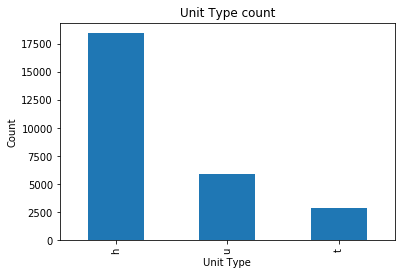

In [29]:
# property types

mdata['Type'].value_counts().plot(kind='bar')
plt.title('Unit Type count')
plt.xlabel('Unit Type')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

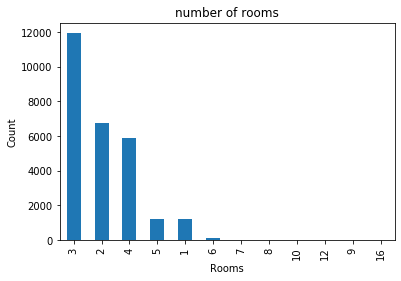

In [30]:

mdata['Rooms'].value_counts().plot(kind='bar')
plt.title('number of rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')


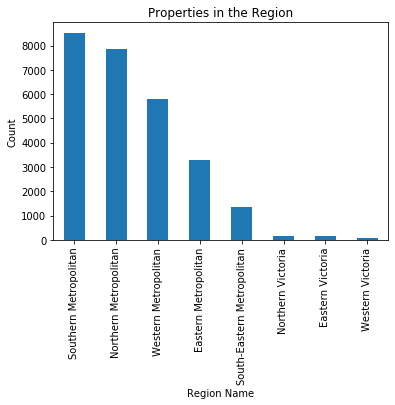

In [31]:
mdata['Regionname'].value_counts().plot(kind='bar')
plt.title('Properties in the Region')
plt.xlabel('Region Name')
plt.ylabel('Count')
plt.show()


From the above graphs, the following conclusions can be drawn for the Melbourne Housing Market:
    1. Majority of the properties are houses.
    2. Properties are concentrated towards 3, 2 and 4 rooms.
    3. Geogrpahic concentration of the properties is in Metroplitan areas specifically: Southern, Northern and Western
    
Next Question: How do our property prices look like across different features?

Text(0, 0.5, 'Median Price')

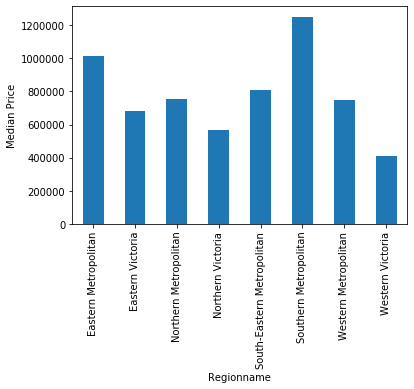

In [32]:
# median price by region. Median is selected since we are aware of outliers in price from the above graphs
mdata.groupby(['Regionname'])['Price'].median().plot(kind='bar')
plt.ylabel('Median Price')


Text(0, 0.5, 'Median Price')

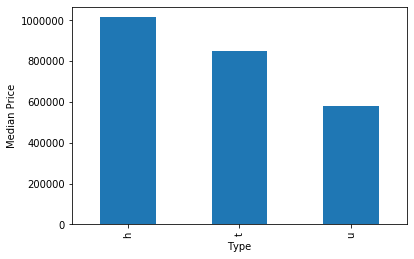

In [33]:
# median price by region
mdata.groupby(['Type'])['Price'].median().plot(kind='bar')
plt.ylabel('Median Price')

# median price across different types


Text(0, 0.5, 'Median Price')

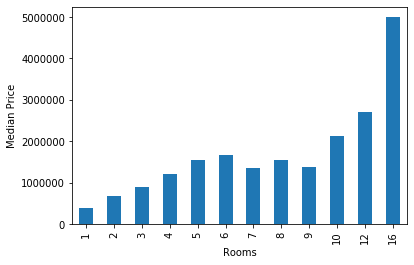

In [34]:
mdata.groupby(['Rooms'])['Price'].median().plot(kind='bar')
plt.ylabel('Median Price')



The median price conclusions we gather from the above graphs are as follows. We selected the median price due to the existence of outliers.

      1. The Median price in the Southern Metropolitan area is the highest with more than AUD 1.2 Mn median price followed by   
      Eastern Metropolitan at approximately AUD 1 Mn.
      2. Houses have the highest median price at AUD 1 million
      3. 3,2 and 4 rooms properties have median prices at approx AUD 900k, AUD 500k and AUD 1.2 M
      


# Checking Linear Relationship Assumption between independent and dependent variables

With so many independent variables it is complicated to see the relationships of all the independent variables with the dependent variable. We can check this assumption through a scatter plot of the residuals. For now, we can check the relationship of a few independent variables with price.

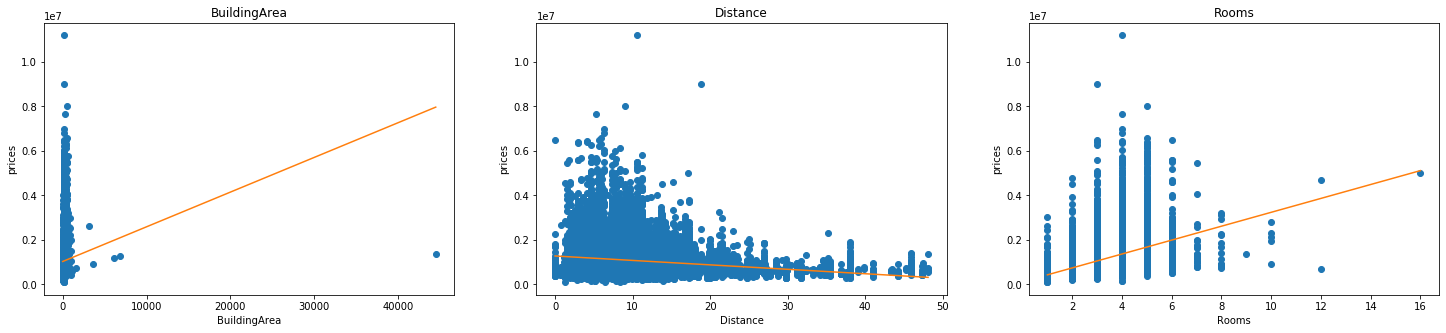

In [35]:
plt.figure(figsize=(25, 5))

columns = {'Rooms','BuildingArea','Distance'}

for i, col in enumerate(columns):

    plt.subplot(1, 3, i+1)
    x = mdata[col]
    y = mdata['Price']
    plt.plot(x, y,'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')



The above graphs show us that there prices points vary across any given Room number, BuildingArea and Distance from Central Business District. The graphs show us that there is not a perfect linear relationship of the variables with Price.

#  Assumption 2: Variables follow a Normal Distribution

((array([-4.05153026, -3.839049  , -3.72293343, ...,  3.72293343,
          3.839049  ,  4.05153026]),
  array([ 1,  1,  1, ..., 12, 12, 16], dtype=int64)),
 (0.9014899061370276, 2.9923652914403176, 0.9440375092279153))

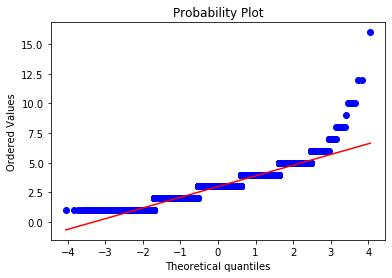

In [36]:
import scipy.stats as stats


stats.probplot(mdata['Rooms'],dist='norm',plot=plt)


((array([-4.05153026, -3.839049  , -3.72293343, ...,  3.72293343,
          3.839049  ,  4.05153026]),
  array([    0.,     0.,     0., ...,  6178.,  6791., 44515.])),
 (50.83371773351511, 142.3224689362796, 0.180764966197657))

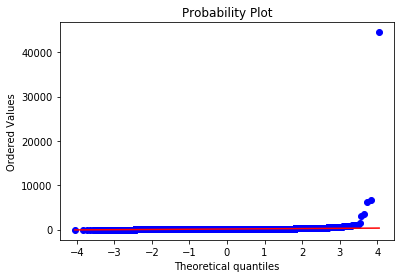

In [37]:
stats.probplot(mdata['BuildingArea'],dist='norm',plot=plt)


((array([-4.05153026, -3.839049  , -3.72293343, ...,  3.72293343,
          3.839049  ,  4.05153026]),
  array([ 0. ,  0. ,  0. , ..., 48.1, 48.1, 48.1])),
 (6.442505006974683, 11.280634268095728, 0.9490413512905799))

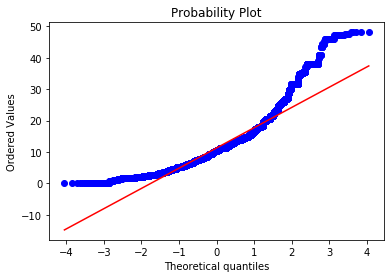

In [38]:
stats.probplot(mdata['Distance'],dist='norm',plot=plt)



The graphs above show that the Rooms and Distance do not follow a linear distribution

# Distribution of the Target Variable in Dataset and Outlier Detection

It was evident from the summary statistics that price (target variable) appears to have outliers. We can check the distribution of the variable below from the Kernal Density plot and box plot. the density plot and box plot for price show that there are present in the price feature. we need to drop these outliers 

When we see these outliers vis-a-vis the group by descriptive statistics for price we see that in some cases
increase in rooms and bigger property types do not have a higher price whereas this pattern is there generally spearking
in most of the data. There is no explanation available from other features why such an anomaly exists
thus we can need to drop such outliers


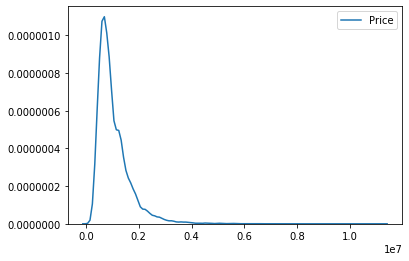

In [39]:
# checking distribution of Price through Kernel Density Plot
sns.kdeplot(mdata['Price'])

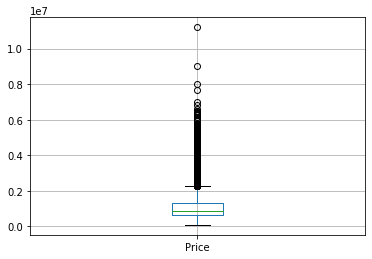

In [40]:
# using box plot to identify the values outside the IQR
mdata.boxplot(column='Price')
plt.show()

Similary, we can see distribution and outliers in price and our independent variables through histograms and box plots. 


<bound method Figure.tight_layout of <Figure size 432x288 with 6 Axes>>

<Figure size 1800x1440 with 0 Axes>

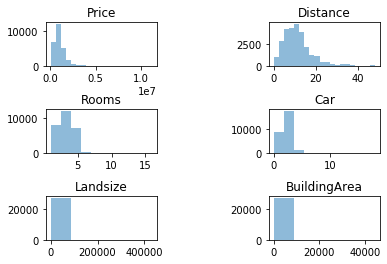

In [41]:
# visualizing distribution outliers through histograms
plt.figure(figsize=(25, 20))

fig, axes = plt.subplots(3,2)

fig.subplots_adjust(hspace=1.0, wspace=1)

axes[0,0].hist(mdata.Price,bins=20,alpha=0.5)
axes[0,0].set_title('Price')

axes[0,1].hist(mdata.Distance,bins=20,alpha=0.5)
axes[0,1].set_title('Distance')

axes[1,0].hist(mdata.Rooms,bins=10,alpha=0.5)
axes[1,0].set_title('Rooms')

axes[1,1].hist(mdata.Car,bins=10,alpha=0.5)
axes[1,1].set_title('Car')

axes[2,0].hist(mdata.Landsize,bins=5,alpha=0.5)
axes[2,0].set_title('Landsize')

axes[2,1].hist(mdata.BuildingArea,bins=5,alpha=0.5)
axes[2,1].set_title('BuildingArea')

fig.tight_layout



<bound method Figure.tight_layout of <Figure size 432x288 with 6 Axes>>

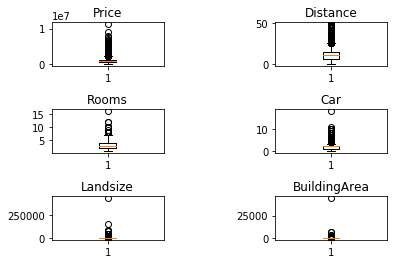

In [42]:

# visualizing distribution outliers through boxplots
fig2, axes2 = plt.subplots(3,2)

fig2.subplots_adjust(hspace=1.0, wspace=1.0)

axes2[0,0].boxplot(mdata.Price)
axes2[0,1].boxplot(mdata.Distance)
axes2[1,0].boxplot(mdata.Rooms)
axes2[1,1].boxplot(mdata.Car)
axes2[2,0].boxplot(mdata.Landsize)
axes2[2,1].boxplot(mdata.BuildingArea)

axes2[0,0].set_title('Price')
axes2[0,1].set_title('Distance')
axes2[1,0].set_title('Rooms')
axes2[1,1].set_title('Car')
axes2[2,0].set_title('Landsize')
axes2[2,1].set_title('BuildingArea')


fig2.tight_layout




We can remove the outliers based on a certain distance from the Inter Quartile Range for each of the variables we have shown above i.e Price, Distance, Rooms, Car, Landsize and BuildingArea.

In [43]:
#IQR with an arbitrary ratio to create a fence as we do not want delete all the values that are on IQR fringes
dist = 0.5 * (np.percentile(mdata['Price'],75) - np.percentile(mdata['Price'],25))
Q1 = np.percentile(mdata['Price'],25)
Q3 = np.percentile(mdata['Price'],75)

mdata = mdata.loc[(mdata['Price'] > Q1-dist) & (mdata['Price'] < Q3+dist)]

mdata.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000,23250.000000
mean,2.884516,861435.993720,11.760490,3111.343312,2.950409,1.372344,1.750538,540.899613,137.182357,1970.226882,-37.800602,144.994104,7612.882968
std,0.883729,319822.966604,7.032881,117.990412,0.766065,0.574585,0.849993,1615.237963,301.522416,22.756542,0.083184,0.111261,4645.651227
min,1.000000,306000.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,610000.000000,6.700000,3043.000000,3.000000,1.000000,1.000000,329.000000,133.000000,1970.000000,-37.835400,144.942270,4217.000000
50%,3.000000,802000.000000,11.200000,3081.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000
75%,3.000000,1092375.000000,14.700000,3150.000000,3.000000,2.000000,2.000000,570.000000,133.000000,1970.000000,-37.757515,145.043352,10529.000000
max,12.000000,1622500.000000,48.100000,3978.000000,12.000000,8.000000,18.000000,146699.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


In [44]:
distD = 0.8 * (np.percentile(mdata['Distance'],75) - np.percentile(mdata['Distance'],25))
Q1D = np.percentile(mdata['Distance'],25)
Q3D = np.percentile(mdata['Distance'],75)

mdata = mdata.loc[(mdata['Distance'] > Q1D-distD) & (mdata['Distance'] < Q3D+distD)]
mdata.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000,21152.000000
mean,2.843750,875401.518202,10.215767,3092.114032,2.915894,1.353678,1.722201,501.789760,134.274936,1969.660221,-37.795999,144.986450,7627.518438
std,0.880517,323831.597214,4.724384,71.998303,0.765349,0.565970,0.831273,782.005370,80.754445,23.290918,0.067349,0.091864,4634.754425
min,1.000000,306000.000000,0.700000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-37.991210,144.611190,121.000000
25%,2.000000,620000.000000,6.400000,3042.000000,3.000000,1.000000,1.000000,302.000000,133.000000,1970.000000,-37.828878,144.938277,4294.000000
50%,3.000000,820000.000000,10.400000,3073.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000
75%,3.000000,1110000.000000,13.800000,3141.000000,3.000000,2.000000,2.000000,554.000000,133.000000,1970.000000,-37.757098,145.029600,10412.000000
max,10.000000,1622500.000000,20.800000,3752.000000,10.000000,8.000000,11.000000,41400.000000,6791.000000,2019.000000,-37.530400,145.255370,21650.000000


In [45]:
distR = 0.8 * (np.percentile(mdata['Landsize'],75) - np.percentile(mdata['Landsize'],25))
Q1R = np.percentile(mdata['Landsize'],25)
Q3R = np.percentile(mdata['Landsize'],75)

mdata = mdata.loc[(mdata['Landsize'] > Q1R-distR) & (mdata['Landsize'] < Q3R+distR)]
mdata.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,2.931709,898284.084403,10.632365,3089.914862,3.019051,1.350670,1.787608,471.012550,137.219300,1968.775171,-37.793153,144.984134,7564.624739
std,0.833068,317416.084430,4.611075,73.700688,0.668159,0.562058,0.801861,151.373345,80.469911,22.520438,0.067841,0.093175,4664.403553
min,1.000000,306000.000000,0.700000,3000.000000,0.000000,0.000000,0.000000,101.000000,0.000000,1820.000000,-37.991210,144.611190,389.000000
25%,2.000000,650000.000000,6.900000,3040.000000,3.000000,1.000000,1.000000,402.000000,133.000000,1970.000000,-37.815070,144.933400,4168.000000
50%,3.000000,850000.000000,10.800000,3072.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6543.000000
75%,3.000000,1150000.000000,13.900000,3132.000000,3.000000,2.000000,2.000000,533.000000,133.000000,1970.000000,-37.753700,145.024210,10412.000000
max,10.000000,1622500.000000,20.800000,3752.000000,10.000000,6.000000,11.000000,755.000000,6791.000000,2019.000000,-37.534460,145.255370,21650.000000


<bound method Figure.tight_layout of <Figure size 432x288 with 6 Axes>>

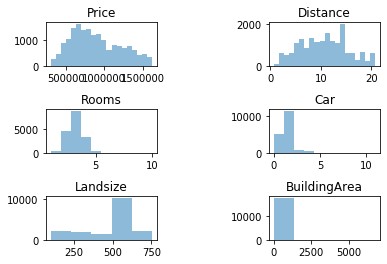

In [46]:
# visualizing distribution outliers through histograms
fig3, axes3 = plt.subplots(3,2)

fig3.subplots_adjust(hspace=1.0, wspace=1.0)

axes3[0,0].hist(mdata.Price,bins=20,alpha=0.5)
axes3[0,1].hist(mdata.Distance,bins=20,alpha=0.5)
axes3[1,0].hist(mdata.Rooms,bins=10,alpha=0.5)
axes3[1,1].hist(mdata.Car,bins=10,alpha=0.5)
axes3[2,0].hist(mdata.Landsize,bins=5,alpha=0.5)
axes3[2,1].hist(mdata.BuildingArea,bins=5,alpha=0.5)

axes3[0,0].set_title('Price')
axes3[0,1].set_title('Distance')
axes3[1,0].set_title('Rooms')
axes3[1,1].set_title('Car')
axes3[2,0].set_title('Landsize')
axes3[2,1].set_title('BuildingArea')




fig3.tight_layout


# Assumption 3: Multicollinearity- Understanding Correlation between Variables

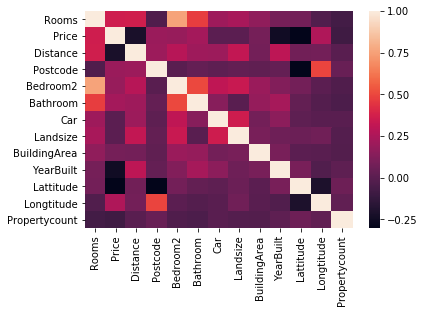

In [47]:
# looking at the correlation matrix through a heatmap
corr=mdata.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

The following conclusions can be drawn from the correlation matrix above

1. Rooms are correlated with Bedroom2 and Bathroom. Thus we can use Rooms instead of these 2 variables.
2. Propertycount does not seem to have any significant correlation with price.
3. Postcode is closely related with Distance from CBD. So we can drop postal code.

# Categorical Variables

In [48]:
# checking unique values of categorical variables and decide which ones to use in the model
for col_name in mdata.columns:
    if mdata[col_name].dtypes == object:
        unique_cat = len(mdata[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))                                                                           


Feature 'Suburb' has 237 unique categories
Feature 'Address' has 17422 unique categories
Feature 'Type' has 3 unique categories
Feature 'Method' has 5 unique categories
Feature 'SellerG' has 274 unique categories
Feature 'CouncilArea' has 26 unique categories
Feature 'Regionname' has 6 unique categories


The number of unique values in fields such as Address and SellerG are exorbitantly high. From an explanation perspective it would be not wise to encode them. However, we can eliminate them once we have more details from model implementation.


In [49]:
#Note to group members: initially i removed these categorical variables. However model performance was very low. 
# I addded Suburb and the model performance improved. Based on this I decided that I will encode all the categorical 
# variables (except Address and SellerG) at this point and remove features after model implementation through backward elimination using p-values

#mdata= mdata.drop(['Address','SellerG','CouncilArea','Suburb','Date'],axis=1)
mdata= mdata.drop(['Address','SellerG'],axis=1)
mdata.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [50]:
#dropping columns that are correlated
mdata= mdata.drop(['Bedroom2','Bathroom','Propertycount','Postcode','Date'],axis=1)
mdata.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname'],
      dtype='object')

So far we have treated missing values, outliers and removed variables that are correlated with other variables and are not correlated with price. Moving onto treating categorical values 

In [51]:
# converting Regionname, Type, Method object datatypes into dummy variables as we can only run regression on numercial values

# creating a list of column names to convert them into dummy values using a function
coldummy = ['Suburb','Type','Method','CouncilArea','Regionname']

# creating a function to convert all the columns passed to it into dummy/indicator values to represent each categoricalvalue
def dummyfn(dftemp,coldummy):
    for val in coldummy:
        # get dummies is a function in panda to allows to convert categorical variable into dummy/indicator variables
        dummvalue = pd.get_dummies(dftemp[val],prefix=val,dummy_na=False) 
        dftemp=dftemp.drop(val,1)
        dftemp = pd.concat([dftemp,dummvalue],axis=1)
    return dftemp

mdata = dummyfn(mdata,coldummy)
print(mdata.head())



    Rooms          Price  Distance      Car   Landsize  BuildingArea  \
1       2 1480000.000000  2.500000 1.000000 202.000000    133.000000   
2       2 1035000.000000  2.500000 0.000000 156.000000     79.000000   
4       3 1465000.000000  2.500000 0.000000 134.000000    150.000000   
6       4 1600000.000000  2.500000 2.000000 120.000000    142.000000   
10      2  941000.000000  2.500000 0.000000 181.000000    133.000000   

     YearBuilt  Lattitude  Longtitude  Suburb_Abbotsford  ...  \
1  1970.000000 -37.799600  144.998400                  1  ...   
2  1900.000000 -37.807900  144.993400                  1  ...   
4  1900.000000 -37.809300  144.994400                  1  ...   
6  2014.000000 -37.807200  144.994100                  1  ...   
10 1970.000000 -37.804100  144.995300                  1  ...   

    CouncilArea_Whitehorse City Council  CouncilArea_Whittlesea City Council  \
1                                     0                                    0   
2               

Moving on to checking duplicate values

# Duplicate Records

In [52]:
#checking duplicate values
dupdf = mdata[mdata.duplicated()]
dupdf


,Rooms,Price,Distance,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Suburb_Abbotsford,...,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
78,4,960000.000000,13.500000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,0,0,0,0,1
332,3,765000.000000,11.100000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,0,0,0,0,1
341,3,800000.000000,11.100000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,0,0,0,0,1
727,2,675000.000000,12.200000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,0,0,0,1,0
1408,4,1200000.000000,13.900000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,0,0,0,1,0
1625,4,1210000.000000,13.900000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,0,0,0,1,0
2585,4,1000050.000000,11.700000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,0,0,0,1,0
4484,4,1225000.000000,6.400000,1.000000,319.000000,130.000000,1915.000000,-37.794300,144.887500,0,...,0,0,0,0,0,0,0,0,0,1
4905,3,600000.000000,13.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,1,0,0,0,0
5833,1,312000.000000,4.200000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,0,...,0,0,0,0,0,1,0,0,0,0


   We have 63 rows with duplicate values.

In [53]:
# dropping all rows with duplicate values
mdata.drop_duplicates(inplace=True)

# verifying removal of duplicated values
dupcheck = mdata[mdata.duplicated()]
dupcheck

,Rooms,Price,Distance,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Suburb_Abbotsford,...,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan


In [54]:
# saving our cleaned dataframe into a csv file
mdata.to_csv('cleanedfile.csv',encoding='utf-8', index=False)
mdata.shape

(17626, 286)

Before moving onto model implementation we can confirm that we have 17,626 instances and 286 columns (as categorial features were converted to dummy variables). 

# Model Development and Testing

In [55]:
#splitting into train and test data
train,test = train_test_split(mdata,test_size=0.3)
print(train.shape)
print(test.shape)


(12338, 286)
(5288, 286)


In [56]:
# creating a for loop to separate price column from other column names so we can separate dependent and independent
# variable names for running the model
colnames= mdata.columns
colname2=[]

for colname in colnames:
    if colname != 'Price':
        colname2.append(colname)
    

colname2

['Rooms',
 'Distance',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Suburb_Abbotsford',
 'Suburb_Aberfeldie',
 'Suburb_Airport West',
 'Suburb_Albanvale',
 'Suburb_Albert Park',
 'Suburb_Albion',
 'Suburb_Alphington',
 'Suburb_Altona',
 'Suburb_Altona Meadows',
 'Suburb_Altona North',
 'Suburb_Ardeer',
 'Suburb_Armadale',
 'Suburb_Ascot Vale',
 'Suburb_Ashburton',
 'Suburb_Ashwood',
 'Suburb_Attwood',
 'Suburb_Avondale Heights',
 'Suburb_Balaclava',
 'Suburb_Balwyn',
 'Suburb_Balwyn North',
 'Suburb_Beaumaris',
 'Suburb_Bellfield',
 'Suburb_Bentleigh',
 'Suburb_Bentleigh East',
 'Suburb_Black Rock',
 'Suburb_Blackburn',
 'Suburb_Blackburn North',
 'Suburb_Blackburn South',
 'Suburb_Box Hill',
 'Suburb_Braybrook',
 'Suburb_Briar Hill',
 'Suburb_Brighton',
 'Suburb_Brighton East',
 'Suburb_Broadmeadows',
 'Suburb_Brooklyn',
 'Suburb_Brunswick',
 'Suburb_Brunswick East',
 'Suburb_Brunswick West',
 'Suburb_Bulleen',
 'Suburb_Bundoora',
 'Suburb_Burnley

In [57]:
import statsmodels.api as sm
model1= sm.OLS(train['Price'],train[colname2])
res = model1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:31:09   Log-Likelihood:            -1.6619e+05
No. Observations:               12338   AIC:                         3.329e+05
Df Residuals:                   12088   BIC:                         3.347e+05
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# Initial Model Results

Initial model results tell us that Rooms, Distance, Car, Landsize, Building Area and Location (represented by Longitude and Lattitude) are most siginificant features in determining the price of a property.

A unit increase in Rooms leads to AUD 133,500 inrease in price
A unit increase in Distance from Central Business District lead to AUD 29,850 decline in price
A unit increase in Car parking available increases the price by AUF 7,822 

Other features lead to smaller inceases or decline in price

Model Evaluation:

1. R2 and Adj. R2 of 0.709 and 0.703 respectively. It shows that while this is a good fit there is still room for improvement.
2. Overall Prob(F-stat) of 0.00 shows that the model is statistically significant in predicting the price and we can reject the null hypothesis.
3. The respective p-value of the above mentioned features show that these features are significant in determining the prediction in price and we can reject the null hypothesis that these variables have no meaningful impact effect on the price prediction.

However, based on the above model results there is still room for improvement. There are many variables that have p-value of more than 0.05. We can exclude these variables through backward elimination and hopefully improve our model results

# Model Testing

In [60]:
# running a linear regression model
model = LinearRegression()
# training the model on the training data
model.fit(train[colname2],train['Price'])
# doing prediction on the test data based on the trained model
pricepred = model.predict(test[colname2])
# creating a dataframe with actual and predicted prices
odf= pd.DataFrame({'Actual':test['Price'],'Predicted':pricepred})
# comparing first 25 predicted prices with the actual prices from the test data in graph
odf.head(25)


,Actual,Predicted
4392,480000.000000,578466.500000
10646,1200000.000000,1190851.250000
5772,620000.000000,936421.000000
15706,875000.000000,658369.500000
1525,1000000.000000,1138104.000000
22847,903000.000000,1035826.000000
26605,505000.000000,536669.500000
2564,752000.000000,991873.750000
10998,935000.000000,977980.000000
8119,715000.000000,625631.250000


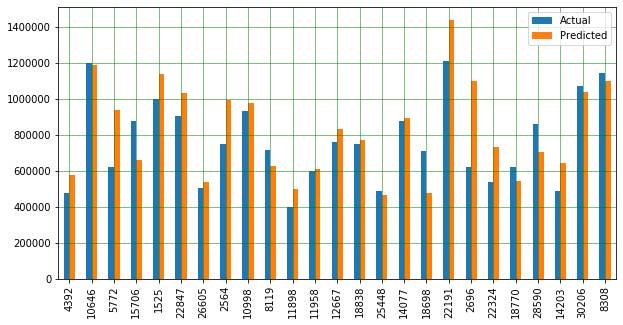

In [61]:
# comparing first 25 predicted prices with the actual prices from the test data in graph
odf2 = odf.head(25)
odf2.plot(kind='bar',figsize=(10,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.show()

Predicted vs Actual bar graph shows that generally our model is good at predicting the price of a property.

In [66]:
# residual calculations

def residualcalc (model,features,target):
    predictions = model.predict(features)
    dfresults = pd.DataFrame({'Actual':target, 'Predicted': predictions})
    dfresults['residuals'] = abs(dfresults['Actual']) - abs(dfresults['Predicted'])
    return dfresults

    
    

In [67]:
# defining linear assumption function
def linearassumption (model,features,target):
    dfresults = residualcalc(model,features,target)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=dfresults, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(dfresults.min().min(), dfresults.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()


C:\Users\Adminuser\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


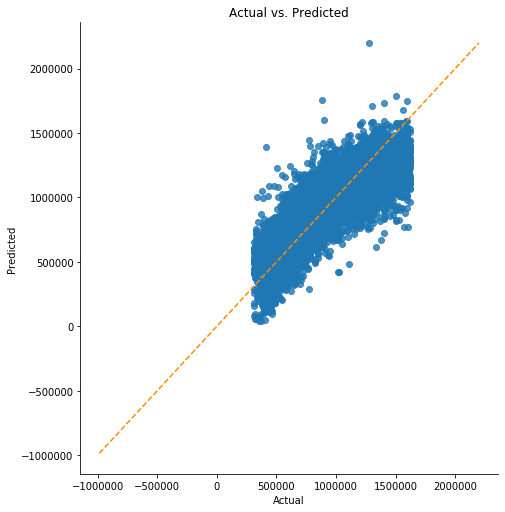

In [68]:
linearassumption(model,train[colname2],train['Price'])

# Checking Assumption of Autocorrelation

In [78]:
# checking autocorrelation through Durbin-Watson test.
#Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
# 0 to 2< is positive autocorrelation
# >2 to 4 is negative autocorrelation

def autocorrelation (model,features,target):
    from statsmodels.stats.stattools import durbin_watson
    
    # Calculating residuals for the Durbin Watson-tests
    dfresults = residualcalc(model, features, target)
    durbinWatson = durbin_watson(dfresults['residuals'])
    print('Durbin-Watson:', durbinWatson)
    


In [79]:
autocorrelation(model,train[colname2],train['Price'])

Durbin-Watson: 2.0175856799232568


A Durbin-Watson score of 2.01 shows that there is no autocorrelation in the data

# Checking Assumption of Homoscedasticity

In [76]:
# Homoscedasticity: Assumes that the errors exhibit constant variance
def homoscedasticity(model, features, target):
        
    # Calculating residuals for the plot
    dfresults = residualcalc(model, features, target)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=dfresults.index, y=dfresults.residuals, alpha=0.5)
    plt.plot(np.repeat(0, dfresults.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

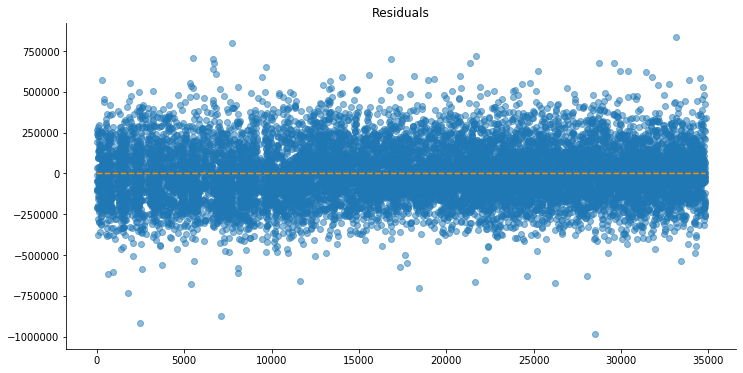

In [77]:
homoscedasticity(model,train[colname2],train['Price'])

Variance in error terms do seem to be relatively constant

# Improving Model

In [58]:
# writing the backwardElimination function to eliminate all variables with p-value more than 0.05

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
# threshold of p=value
SL = 0.05

XElim = train.drop(['Price'],axis=1)
y= train.iloc[:,1].values
X_opt= XElim.iloc[:,:].values

X_Modeled = backwardElimination(X_opt, SL)



In [59]:
regressor_OLS=sm.OLS(y,X_Modeled)
reg= regressor_OLS.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2543.
Date:                Sun, 22 Dec 2019   Prob (F-statistic):                        0.00
Time:                        15:35:07   Log-Likelihood:                     -1.6625e+05
No. Observations:               12338   AIC:                                  3.328e+05
Df Residuals:                   12196   BIC:                                  3.338e+05
Df Model:                         142                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.338e+05   2380.030     56.212      0.000    1.29e+05    1.38e+05
x2          -2.37e+04   1035.333    -22.892      0.000   -2.57e+04   -2.17e+04
x3          9703.0787   2138.267      4.538      0.000    5511.736    1.39e+04
x4            68.7296     12.178      5.644      0.000      44.858      92.601
x5           148.7932     21.950      6.779      0.000     105.767     191.819
x6          -818.1492     78.877    -10.372      0.000    -972.761    -663.538
x7         -2.255e+05   4.28e+04     -5.267      0.000   -3.09e+05   -1.42e+05
x8         -4.661e+04   1.13e+04     -4.128      0.000   -6.87e+04   -2.45e+04
x9          1.474e+05   3.67e+04      4.017      0.000    7.55e+04    2.19e+05
x10         -8.07e+04   2.36e+04     -3.422      0.001   -1.27e+05   -3.45e+04
x11        -1.821e+05   7.78e+04     -2.342      0.019   -3.35e+05   -2.97e+04
x12         2.707e+05   4.68e+04      5.787      0.000    1.79e+05    3.62e+05
x13         2.463e+05   3.79e+04      6.504      0.000    1.72e+05    3.21e+05
x14         1.867e+05   2.52e+04      7.421      0.000    1.37e+05    2.36e+05
x15         1.713e+05   3.05e+04      5.608      0.000    1.11e+05    2.31e+05
x16         -1.81e+05   2.27e+04     -7.970      0.000   -2.25e+05   -1.36e+05
x17         6.257e+04    2.5e+04      2.502      0.012    1.36e+04    1.12e+05
x18         1.042e+05   2.22e+04      4.693      0.000    6.07e+04    1.48e+05
x19        -2.315e+05   5.35e+04     -4.326      0.000   -3.36e+05   -1.27e+05
x20         1.724e+05   2.59e+04      6.649      0.000    1.22e+05    2.23e+05
x21         8.929e+04   2.37e+04      3.762      0.000    4.28e+04    1.36e+05
x22         1.039e+05   3.58e+04      2.901      0.004    3.37e+04    1.74e+05
x23        -1.171e+05   2.57e+04     -4.565      0.000   -1.67e+05   -6.68e+04
x24         5.458e+04   2.34e+04      2.337      0.019    8794.381       1e+05
x25        -6.398e+04   2.62e+04     -2.445      0.014   -1.15e+05   -1.27e+04
x26          8.92e+04   1.73e+04      5.161      0.000    5.53e+04    1.23e+05
x27         5.535e+04   2.36e+04      2.346      0.019    9102.211    1.02e+05
x28        -4.863e+04   2.35e+04     -2.070      0.038   -9.47e+04   -2577.069
x29         1.391e+05   3.76e+04      3.701      0.000    6.54e+04    2.13e+05
x30         2.378e+05   4.07e+04      5.839      0.000    1.58e+05    3.18e+05
x31         6.044e+04   2.73e+04      2.213      0.027    6909.186    1.14e+05
x32        -1.573e+05   8.01e+04     -1.963      0.050   -3.14e+05    -247.048
x33         1.288e+05   3.55e+04      3.629      0.000    5.92e+04    1.98e+05
x34        -1.136e+05   2.14e+04     -5.303      0.000   -1.56e+05   -7.16e+04
x35         9.069e+04   4.04e+04      2.247      0.025    1.1

# Improved Model Results 

After backward elimination, the multiple regression model results improved alot. R2 and Adj R2 improved to 0.967 and 0.967 respectively. The p-value of the model is still 0.00.

The p-values of our independent variables have remained intact with the following conclusions:

A unit increase in Rooms leads to AUD 133,200 inrease in price
A unit increase in Distance from Central Business District lead to AUD 27,600 decline in price
A unit increase in Car parking available increases the price by AUF 7,628 

Other features lead to smaller inceases or decline in price

